# This is our Task
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
● As a business manager, try to find out the weak areas where you can
work to make more profit.
● What all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
d = pd.read_csv("SampleSuperstore.csv")

In [3]:
d

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
#checking the type of data available in columns
d['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [5]:
d['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
d['Country'].unique()

array(['United States'], dtype=object)

In [7]:
d['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [8]:
d['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
d['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
d['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [11]:
for col in d:
    if col == 'Country' or col == 'State' or col == 'City' or col == 'Postal Code':
        continue
    print(d[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
[261.96  731.94   14.62  ... 437.472  97.98  243.16 ]
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
[ 41.9136 219.582    6.8714 ...  16.124    4.1028  72.948 ]


In [12]:
#to check is there any null values
d.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#its returns all details about coloumn
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

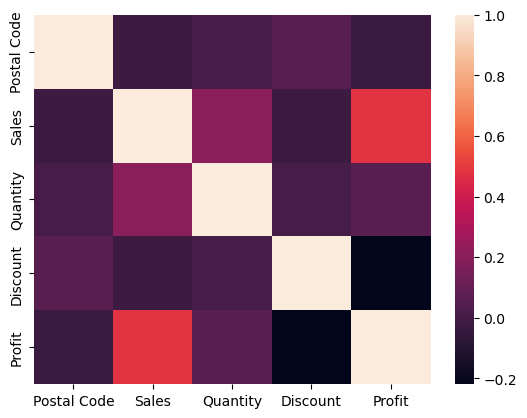

In [14]:
#heat map is used to see the corlation betwee the data
sns.heatmap(d.corr())

In [15]:
d


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [16]:
#this problem break into two problems to easyly understand
loss = d[d['Profit']<0]
profit = d[d['Profit']>0]

In [17]:
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [18]:
profit['Profit'].mean()

54.917883767684025

In [19]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [20]:
loss['Profit'].mean()

-83.44804152859435

<AxesSubplot:xlabel='Region', ylabel='count'>

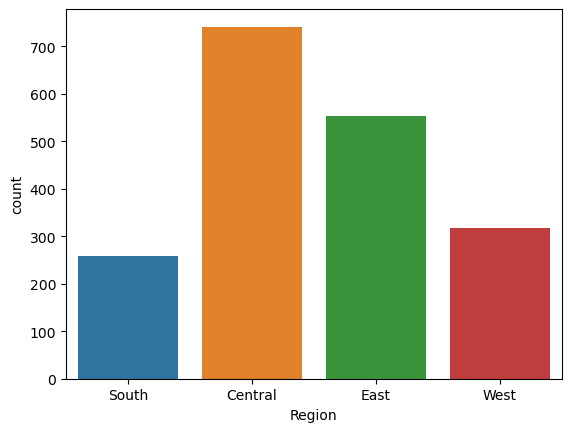

In [21]:
#we see that sales of region where central is high
sns.countplot(data = loss, x = 'Region')

<AxesSubplot:title={'center':'Profit'}, xlabel='Region', ylabel='count'>

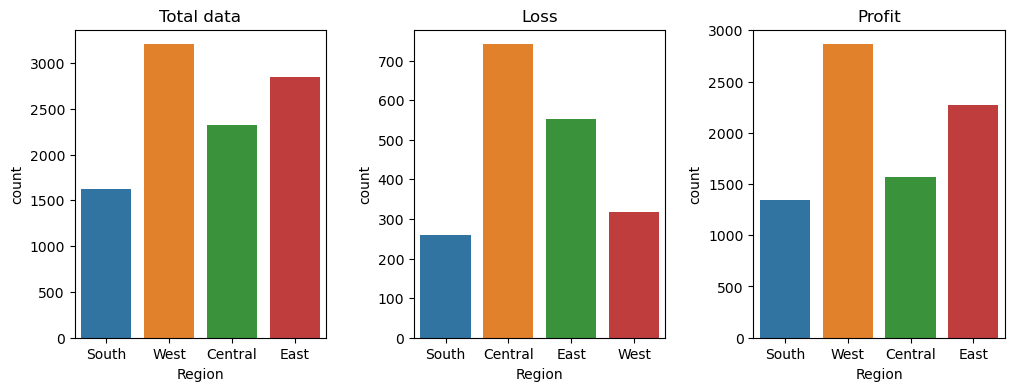

In [22]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.35)

plt.subplot(1, 3, 1)
plt.title('Total data')
sns.countplot(data=d, x='Region')

plt.subplot(1, 3, 2)
plt.title('Loss')
sns.countplot(data=loss, x='Region')

plt.subplot(1, 3, 3)
plt.title('Profit')
sns.countplot(data=profit, x='Region')


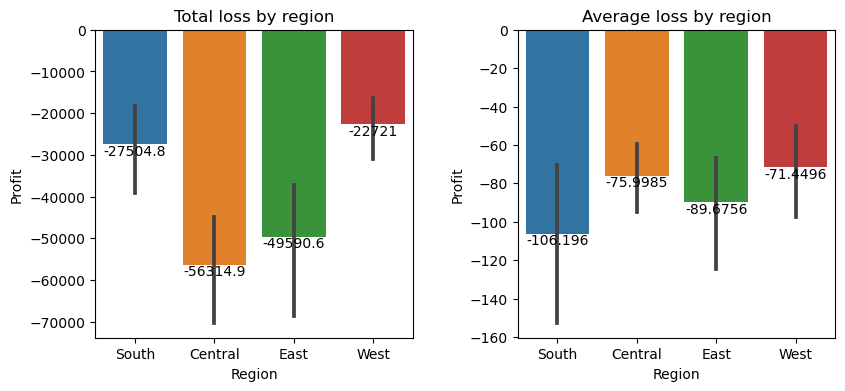

In [23]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.33) 
plt.subplot(1,3,1)
plt.title('Total loss by region')
x = sns.barplot(data = loss, x= 'Region',y='Profit',estimator=np.sum)
for i in x.containers:
    x.bar_label(i,)
plt.subplot(1,3,2)
plt.title('Average loss by region')
y = sns.barplot(data = loss, x= 'Region',y='Profit')
for i in y.containers:
    y.bar_label(i,)

In [24]:
losspivot = loss.pivot_table(values='Profit',index='Category',columns='Region')
losspivot

Region,Central,East,South,West
Category,,,,
Furniture,-61.685695,-102.183616,-171.069390,-81.664088
Office Supplies,-89.291108,-42.022274,-57.138301,-33.577703
Technology,-66.864371,-154.394354,-253.848274,-117.029733


In [25]:
profitpivot = profit.pivot_table(values='Profit',index='Category',columns='Region')
profitpivot 

Region,Central,East,South,West
Category,,,,
Furniture,106.263159,53.548900,62.521463,44.580967
Office Supplies,40.578683,34.585275,36.175279,31.646731
Technology,99.929152,171.578114,107.158184,93.272583


In [26]:
datapivot = d.pivot_table(values='Profit',index='Category',columns='Region')
datapivot

Region,Central,East,South,West
Category,,,,
Furniture,-5.968918,5.068496,20.395199,16.272914
Office Supplies,6.244712,23.957114,20.086827,27.733183
Technology,80.231981,88.714084,68.231506,73.962687


<AxesSubplot:title={'center':'Profit data'}, xlabel='Region', ylabel='Category'>

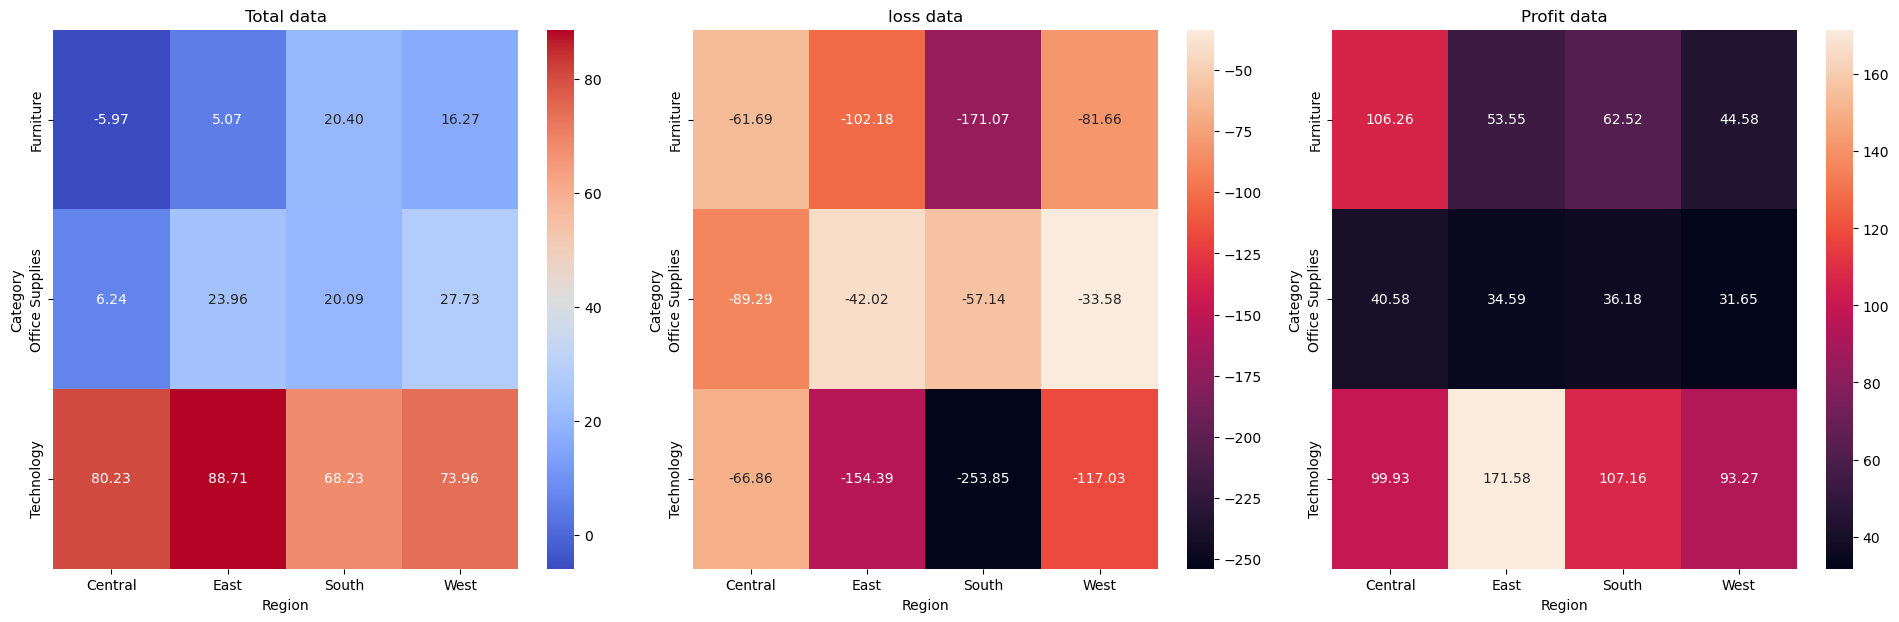

In [27]:
plt.figure(figsize=(24, 7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,3,1)
sns.heatmap(datapivot, annot = True, cmap = 'coolwarm',fmt='.2f')
plt.title("Total data")
plt.subplot(1,3,2)
sns.heatmap(losspivot, annot = True,fmt='.2f')
plt.title("loss data")
plt.subplot(1,3,3)
plt.title("Profit data")
sns.heatmap(profitpivot,fmt='.2f', annot = True)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

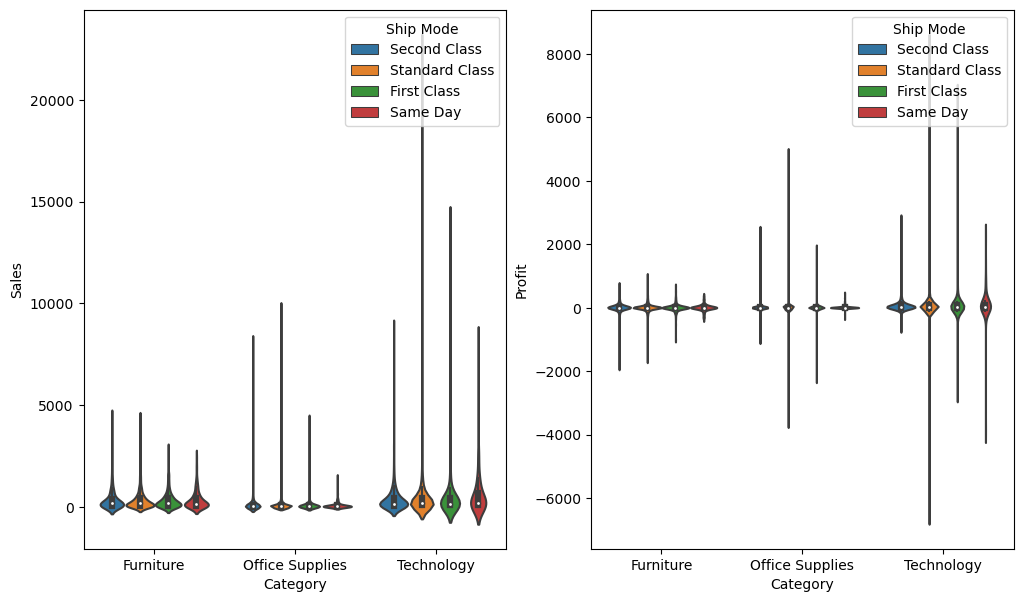

In [28]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.violinplot(data = d, x= 'Category',y = 'Sales', hue = "Ship Mode")
plt.subplot(1,2,2)
sns.violinplot(data = d, x= 'Category',y = 'Profit', hue = "Ship Mode")

In [ ]:
sns.swarmplot(data = d, x = 'Segment', y= 'Profit')